## Define Business Objective

Help an airline company notify it's passengers know whether a flight will be delayed 24 hours in advance. 

## Define Success

Figure out what the current baseline model is & try to outperform it.

How to represent expected output (True: flight delayed / False: flight not delayed)?


## Airline On-Time Performance Data Dictionary

|Column   | Description  | Type  |Questions/Comments | 
|:-:|---|---|---|
| Year  | year of the flight  | Integer  |    |
| Month  | month of the flight | Integer  |    |
| DayofMonth  | day of the month (1 to 31)  | Integer  |    |
| DayOfWeek  | day of the week  |  Integer |    |
| DepTime  | actual departure time |  Float | Is this available 24 hours prior to departure (i.e. time of prediction)?   |
| CRSDepTime  | scheduled departure time  | Integer  | Is this available 24 hours prior to departure (i.e. time of prediction)?   |
| ArrTime  | actual arrival time   | Float  |  Is this info available during time of prediction?     |
| CRSArrTime  | scheduled arrival time   | Integer  |  Is this info available during time of prediction?  How likely is it to change?    |
| UniqueCarrier  | carrier ID  | String  |  Why would this matter?  |
| FlightNum  | flight number   |  Integer |  How are flight numbers assigned?  |
| TailNum  | plane's tail number   | String  |  How are tail numbers assigned & why would that matter? What happens if this plane is decomissioned?   |
| ActualElapsedTime  | actual elapsed time of the flight, in minutes   | Float  | Is this info available during time of prediction?  What happens if we include this variable in the model?   |
| CRSElapsedTime  | scheduled elapsed time of the flight, in minutes   |  Float |   Is this info available during time of prediction?  How likely is it to change?  |
| AirTime  | airborne time for the flight, in minutes   | Float  |   Is this info available during time of prediction?   |
| ArrDelay  | arrival delay, in minutes  |  Float |   Is this info available during time of prediction?   |
| DepDelay  |  departure delay, in minutes   | Float  |  Is this info available during time of prediction?    |
| Origin  | originating airport    | String   |  How likely is this to change?   |
| Dest  | destination airport  | String  |  How likely is this to change?   |
| Distance  | flight distance    | Float  |  How likely is this to change?  |
| TaxiIn  | taxi time from wheels down to arrival at the gate, in minutes    |  Float |  Is this info available during time of prediction?  |
| TaxiOut  | taxi time from departure from the gate to wheels up, in minutes  | Float  | Is this info available during time of prediction?   |
| Cancelled  | cancellation status (stored as logical).   | Integer  | Should we bother predicting whether flight is delayed or not for a cancelled flight?   |
| CancellationCode  | cancellation code, if applicable   | String  | Should we bother predicting whether flight is delayed or not for a cancelled flight?     |
| Diverted  | diversion status  | Integer   | Is this info available during time of prediction?    |
| CarrierDelay  | delay, in minutes, attributable to the carrier   |  Float |    |
| WeatherDelay  | delay, in minutes, attributable to weather factors  | Float  |  Weather predictions are available 24 hour in advance. Will you still include this variable if the model is expected run 48 hours instead of 24 hours in advance? How about if model expected to run 4 hours instead of 24 hours in advance? |
| NASDelay  | delay, in minutes, attributable to the National Aviation System   | Float  | How far in advance do we know about national aviation delays? Consult domain expert.    |
| SecurityDelay  | delay, in minutes, attributable to security factors    | Float  | How far in advance do we know about security delays? Consult domain expert.   |
| LateAircraftDelay  | delay, in minutes, attributable to late-arriving aircraft  | Float  |   How far in advance do we know about security delays? Consult domain expert.  |
| IsArrDelayed  | represents whether flight arrival was delayed or not  | String  |  How was this generated? How is delayed define (in terms of mins)? Should you trust this? |
| IsDepDelayed  | represents whether flight departure was delayed or not  | String  | How was this generated? How is delayed define (in terms of mins)? Should you trust this?   |


*note*: Determine what unit time is representd in? Local (PST, CT, EST) or Universal (UTC)? If not universal, we'll have to normalize time to a universal standard.

### Variables Not to be used for training a ML model: todo
Not all variables available in the dataset should be used during training. Here is a list of questions to help you figure out which variables to exclude from the training production.
 

1. Is the variable available during time of inference (i.e. production prediction)? You'll want to first know when you'll be making a prediction? 
 1. Do you know if a plane will arrive late prior to taking off?
 
 
2. In some regulated industries, some variables are illegal to use for predictive modeling. 
 1. For example, personally identifiable information (PII) is one such example.
 
 
3. How likely is the variable available in production?
 1. Determine a threshold for how available you expect a variable to be available during time of inference and remove variables which exceed that threshold.

## Supervised Learning Pipeline
Here is a general end to end pipeline for a data science project.

1. Define Business Objective & Criteria for Success
    + Experimental Design
        + Identify the business/product objective
        + Identify & hypothesize goals and criteria for success
        + Create a set of questions for identifying correct data set
        + Define which machine learning evaluation metric will be used to quantify quality of predictions
        + Identify data sources, time window of data collected, data formats, data dictionary, features, target & evaluation metric
2. Data Aquisition
    + Define what/how much data we need, where it lives, what format it's in & load dataset
    + Import data from local or remote data source & determine the most approperiate tools to work with the data
        + Pandas has functions for common open source data formats including data base connectors for MySQL & PostgreSQL
        + Use Spark for Big Data
    + Gather/Read any documentation available for the data (schema, data dictionary)
    + Load and pre-process the data into a representation which is ready for model training
        + If the data is available in an open source data format (JSON, CSV, XML, EXCEL), you'll be able to leverage open source tools
        + If the data is available in a closed source format(fixed formatted row) then you will need to develop a parser to format the data into approperiate columns
        + Ensure correct data types are imputed
        + Look at the values. Ensure they make sense in the context of each column
        + Look for missing/empty values
        + For categorical fields, what are the unique values in the field?
        + For numeric fields, are all values numbers?
        + Split-out validation dataset
3. Exploratory Data Analysis
    + Gather insights by using exploratory methods, descriptive & inferential statistics
        + Find median, mode, std dev, min, max, average for each column. Do these make sense in the context of the column?
        + Do financial values have reasonable upper bounds?
        + Univariate feature distributions (to observe stability & other patterns of a given feature like skew)
        + Feature & target correlations
        + Target analysis (plot of feature vs target)
        + Are there any outliers?
        + Do the column values seem to follow a normal distribution? Uniform? Exponential (i.e. long tail)? If exponential, taking log(X) may be beneficial for linear regerssion. 
4. Feature Engineering
    + Perform feature scaling / normalization
    + Inject domain knowledge (structure) into the data by adding or modifying existing columns
        + Linear combinations of two or more features (ratios or other arithmetic variations) 
        + Adding new columns for day of year, hour of day from a datetime column
    + Convert categorical data into numerical values using one-hot encoding
5. Feature Selection
    + Drop highly correlated features (see correlation section above)
    + PCA
    + Recusive Feature Elimination
    + Regularization method using LASSO
6. Select, build & evaluate the model
    + Establish a baseline model for comparison
    + Spot Check & Compare Algorithms
    + Run a spot check of single model performance & tune the top 3 best performing learners 
        + Evaluate Algorithms with Standardization
        + Improve accuracy 
    + You may generally find ensemble Methods (such as Bagging and Boosting, Gradient Boosting) to be quite useful
7. Refine the model (Hyper-parameter tuning)
    + Use GridSearch to search & tune hyper-parameters
9. Finalize Model (use all training data and confirm using validation dataset)
    + Save model binary along with model training results
    + Predictions on validation dataset
10. Communicate the results
    + Summarize findings with narrative, storytelling techniques
    + Present limitations, assumptions of your analysis
    + Identify follow-up problems and questions for future analysis

In [1]:
#load libraries
from __future__ import print_function

import math
import numpy as np
import time
from IPython import display
print('numpy: {}'.format(np.__version__))

from matplotlib import pyplot
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction import FeatureHasher

print('sklearn: {}'.format(sklearn.__version__))

import mlflow
import mlflow.sklearn
from mlflow import version
from mlflow import sklearn
print('mlflow: {}'.format(version.VERSION))

import xgboost as xgb
from xgboost import plot_importance
print('xgboost: {}'.format(xgb.__version__))

import shap
print('shap: {}'.format(version.VERSION))

import joblib
import pickle
import json
import copy
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 40
pd.options.display.float_format = '{:.1f}'.format

seed = 42
OUTPUT_DIR="../data/processed/"

numpy: 1.14.3
pandas: 0.23.0
sklearn: 0.19.1
mlflow: 0.4.2
xgboost: 0.72
shap: 0.4.2


In [2]:
# load data
def load_data(location, data_format="csv"):
    if(data_format=="csv"):
        df = pd.read_csv(location, encoding="ISO-8859-1", low_memory=False)
        df = df.reindex(
            np.random.permutation(df.index))
    else:
        print("{} format not currently supported".format(data_format))
    return df

airlines_df = load_data("../data/external/allyears2k.csv")
target = "IsDepDelayed"
print("Dataset has {} entries and {} features".format(*airlines_df.shape))
# preview data
airlines_df.head()

Dataset has 43978 entries and 31 features


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
18917,1996,1,6,6,1256.0,1125,1500.0,1330,HP,854,...,0,NaN,0,nan,nan,nan,nan,nan,YES,YES
14364,1994,1,30,7,659.0,700,905.0,851,US,237,...,0,NaN,0,nan,nan,nan,nan,nan,YES,NO
4115,1989,1,19,4,626.0,625,954.0,951,UA,184,...,0,NaN,0,nan,nan,nan,nan,nan,YES,YES
28595,2001,1,23,2,2052.0,2055,2216.0,2224,US,399,...,0,NaN,0,nan,nan,nan,nan,nan,NO,NO
43803,2008,1,3,4,1931.0,1825,2052.0,1950,WN,794,...,0,NaN,0,0.0,0.0,0.0,0.0,62.0,YES,YES


Observe columns available in the dataset...

In [3]:
airlines_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'IsArrDelayed', 'IsDepDelayed'],
      dtype='object')

In [4]:
airlines_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,43978.0,43978.0,43978.0,43978.0,42892.0,43978.0,42783.0,43978.0,43978.0,42783.0,...,43943.0,27952.0,27954.0,43978.0,43978.0,8933.0,8933.0,8933.0,8933.0,8933.0
mean,1997.5,1.4,14.6,3.8,1345.8,1313.2,1504.6,1485.3,818.8,124.8,...,730.2,5.4,14.2,0.0,0.0,4.0,0.3,4.9,0.0,7.6
std,6.3,1.9,9.2,1.9,465.3,476.3,484.3,492.8,777.4,74.0,...,578.4,4.2,9.9,0.2,0.0,16.2,4.4,18.6,0.4,23.5
min,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,16.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1992.0,1.0,6.0,2.0,929.0,910.0,1118.0,1109.0,204.0,71.0,...,326.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1997.5,1.0,14.0,4.0,1330.0,1320.0,1527.0,1516.0,557.0,101.0,...,541.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2003.0,1.0,23.0,5.0,1735.0,1720.0,1917.0,1903.0,1242.0,151.0,...,920.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,3949.0,475.0,...,3365.0,128.0,254.0,1.0,1.0,369.0,201.0,323.0,14.0,373.0


In [5]:
# dataset size 
airlines_df.shape

(43978, 31)

#### Target Analysis
Check if any instances don't contain a label...

In [6]:
airlines_df["IsDepDelayed"].isnull().sum()

0

In [7]:
airlines_df["IsDepDelayed"].value_counts()

YES    23091
NO     20887
Name: IsDepDelayed, dtype: int64

In [8]:
y = airlines_df.IsDepDelayed
y.head()

18917    YES
14364     NO
4115     YES
28595     NO
43803    YES
Name: IsDepDelayed, dtype: object

In [9]:
# check how many missing values each feature contains
airlines_df.isnull().sum(axis = 0)

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1086
CRSDepTime               0
ArrTime               1195
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum              16024
ActualElapsedTime     1195
CRSElapsedTime          13
AirTime              16649
ArrDelay              1195
DepDelay              1086
Origin                   0
Dest                     0
Distance                35
TaxiIn               16026
TaxiOut              16024
Cancelled                0
CancellationCode     43757
Diverted                 0
CarrierDelay         35045
WeatherDelay         35045
NASDelay             35045
SecurityDelay        35045
LateAircraftDelay    35045
IsArrDelayed             0
IsDepDelayed             0
dtype: int64

In [10]:
raw_features_not_to_use = ["DepTime", "ArrTime", "TailNum", "ActualElapsedTime", "AirTime", "ArrDelay",  "FlightNum",
                   "DepDelay", "TaxiIn", "TaxiOut",  "CancellationCode", "Diverted", "CarrierDelay", "Cancelled",
                   "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "IsArrDelayed", "IsDepDelayed"]
    
raw_features_to_use = ["Year", "Month", "DayofMonth", "DayOfWeek", "CRSDepTime", "CRSArrTime", 
                       "UniqueCarrier", "CRSElapsedTime", "Origin", "Dest", "Distance"] 
raw_features_to_encode = ['UniqueCarrier','Dest','Origin']

assert(len(raw_features_not_to_use) + len(raw_features_to_use) == airlines_df.shape[1])

def filter_training_data(df, raw_features_not_to_use):
    print("\nGet Training Data...")
    print("Original shape: {}".format(df.shape))
    df = df.drop(raw_features_not_to_use, axis=1, errors='ignore')
    print("After columns dropped shape: {}".format(df.shape))
    return df

def label_encode_target(y):
    print("\nLabel Encode Target into Integers...")
    # encode string class values as integers
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(y)
    label_encoded_y = label_encoder.transform(y)
    return label_encoded_y

# caution: a feature level can be exclusively in training data not in testing data set or vice versa
def naive_one_hot_encode(df, cols_to_encode=[]):
    print("\nNaive One-Hot-Encode for features: {}".format(cols_to_encode))    
    print("\nTotal number of features before encoding: {}".format(df.shape[1]))    
    for col in cols_to_encode:
        # use pd.concat to join the new columns with your original dataframe
        df = pd.concat([df,pd.get_dummies(df[col], prefix=col+"_")],axis=1)
        df = df.drop(col,axis=1)
    print("\nTotal number of features after encoding: {}".format(df.shape[1]))    
    return df

# solution to ensure feature levels not in training set are handeled properly
def categorical_encode(df, train_features_encoded, raw_features_to_encode=[]):
    print("\nTotal number of features before encoding: {}".format(df.shape[1]))    
    
    # Reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html
    # By default values in the new index that do not have corresponding records in the dataframe are assigned NaN
    df = df.reindex(columns=train_features_encoded.columns, fill_value=0) # Fill with 0s)
    print("\nTotal number of features after encoding: {}".format(df.shape[1]))    
    return df

def log_metrics(actual, predictions, set_name, additional_data={}):
    # XGBoost outputs probabilities by default and not actual class labels. To calculate accuracy we 
    # need to convert these to a 0/1 label. We will set 0.5 probability as our threshold.    
    rounded_predictions = predictions.round()
    
    print("\nConfusion Matrix...")
    matrix = confusion_matrix(actual, rounded_predictions)
    print(matrix)
    print("\nClassification Report...")    
    print(classification_report(actual, rounded_predictions))
    
    precision = precision_score(actual, rounded_predictions)
    accuracy = accuracy_score(actual, rounded_predictions)
    auc = average_precision_score(actual, predictions)
    print('Predict {} Set AUC: {:.6f}  Precision: {:.2f}   Accuracy: {:.2f}'.format(set_name, 
                                                                                    auc, 
                                                                                    precision,                                                                                     
                                                                                    accuracy * 100.0))
    # Logging test scores
    mlflow.log_param("accuracy", accuracy)
    mlflow.log_param("precision", precision)
    mlflow.log_param("AUC", auc)    
    mlflow.log_param("TP", matrix[0][0])
    mlflow.log_param("FP", matrix[0][1])
    mlflow.log_param("FN", matrix[1][0])
    mlflow.log_param("TN", matrix[1][1])
    for metric, value in additional_data.items():
        print("Logging {} {}".format(metric, value))
        if metric == "importances" or metric=="params":
            for feat, importance in value.items():
                if metric == "importances":
                    prefix = "imp_"
                elif metric=="params":
                    prefix = "params_"
                mlflow.log_param(prefix + feat, importance)   
        mlflow.log_param(metric, value)   
    run_id = mlflow.tracking.active_run().info.run_uuid
    print("Run with id %s finished" % run_id)
    
# def persist_model(model, dataset_name, train, train_target, train_encoded_features):
def persist_model(model, dataset_name, train, test, X_train, y_train, train_encoded_features):
    import os
    # save model artifacts
    cwd = os.getcwd()
    X_train_filename = OUTPUT_DIR + dataset_name + "_X_train_set.pkl"
    y_train_target_filename = OUTPUT_DIR + dataset_name + "_y_train.pkl"
    train_encoded_features_filename = OUTPUT_DIR + dataset_name + "_train_features_encoded.pkl"    
    joblib.dump(model, OUTPUT_DIR + "model_xgboost") 

    train.to_csv(OUTPUT_DIR + 'train.csv', sep=',')
    test.to_csv(OUTPUT_DIR + 'test.csv', sep=',')

    X_train.to_pickle(X_train_filename) 
    print("Finished saving X_train set")

    f1=open(y_train_target_filename,'wb')
    pickle.dump(y_train, f1) 
    print("Finished saving y_train: {}".format(y_train))

    train_encoded_features.to_pickle(train_encoded_features_filename) 
    print("Finished saving train_encoded_features")

The native XGBoost API
Although the scikit-learn API of XGBoost (shown in the previous tutorial) is easy to use and fits well in a scikit-learn pipeline, it is sometimes better to use the native API. Advantages include:

Automatically find the best number of boosting rounds
Built-in cross validation
Custom objective functions


Label Encode Target into Integers...

Label Encode Target into Integers...

Get Training Data...
Original shape: (29465, 31)
After columns dropped shape: (29465, 11)

Get Training Data...
Original shape: (14513, 31)
After columns dropped shape: (14513, 11)

Total number of features before encoding: 11

Total number of features after encoding: 282

Total number of features before encoding: 11

Total number of features after encoding: 282
Train Set size: (23572, 282)
Validation Set size: (5893, 282)
Test Set size: (14513, 11)
XGBoost Params:                 {"objective": "binary:logistic", "booster": "gbtree", "eval_metric": "auc", "eta": 0.01, "nround": 1000, "tree_method": "exact", "max_depth": 5, "subsample": 0.5, "min_child_weight": 1, "silent": 1, "seed": 42}
[0]	train-auc:0.688098	eval-auc:0.667556
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 20 rounds.
[1]	train-auc:0.69986	eval-auc:0.67822
[2]	t

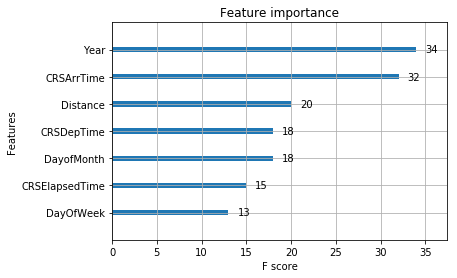

In [11]:
def build_model_pipeline(train,
                         test, 
                         raw_features_to_use, 
                         raw_features_not_to_use, 
                         target, 
                         missing=-9999, 
                         test_size=.20, 
                         random_state=42):    
    
    start_time = time.time()
    # Create a training matrix.
    label_encoded_train_y = label_encode_target(train[target])
    label_encoded_test_y = label_encode_target(test[target])

    
    train_transformed = filter_training_data(train, raw_features_not_to_use)
    test_transformed = filter_training_data(test, raw_features_not_to_use)

    assert(len(train_transformed.columns) == len(raw_features_to_use))
    train_features_encoded = pd.get_dummies(train_transformed[raw_features_to_use], columns=raw_features_to_encode)
    train_transformed = categorical_encode(train_transformed, train_features_encoded, raw_features_to_encode)
    test = categorical_encode(test_transformed, train_features_encoded, raw_features_to_encode)
      
    X_train, X_valid, y_train, y_valid = train_test_split(train_transformed, 
                                                          label_encoded_train_y, 
                                                          test_size=test_size, 
                                                          random_state=random_state)
    print('Train Set size:', X_train.shape)
    print('Validation Set size:', X_valid.shape)
    print('Test Set size:', test_transformed.shape)
    
    X_train.fillna(missing, inplace=True)    
    X_valid.fillna(missing, inplace=True)
    test_transformed.fillna(missing, inplace=True)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "eta": .01,
        'nround': 1000,
        "tree_method": 'exact',
        "max_depth": 5,
        "subsample": 0.5,
        'min_child_weight': 1,
        "silent": 1,
        "seed": random_state }
    print("XGBoost Params:                 " + json.dumps(params))
    num_boost_round = 5
    early_stopping_rounds = 20

    gbm = xgb.train(params, 
                    dtrain, 
                    num_boost_round, 
                    evals=watchlist, 
                    early_stopping_rounds=early_stopping_rounds, 
                    verbose_eval=True)
    # explain the model's predictions using SHAP values
    # (same syntax works for LightGBM, CatBoost, and scikit-learn models)
    explainer = shap.TreeExplainer(gbm)
    shap_values = explainer.shap_values(X_train)
    
    print("\nFeature Importances...")
    importances = gbm.get_fscore()
    
    validation_set_predictions = gbm.predict(xgb.DMatrix(X_valid), ntree_limit=gbm.best_iteration+1)   
    log_metrics(y_valid, validation_set_predictions, "Validation", {"params":params, "importances": importances})        

    test_set_predictions = gbm.predict(xgb.DMatrix(test), ntree_limit = gbm.best_iteration+1)
    log_metrics(label_encoded_test_y, test_set_predictions, "Test")        

    # Saving the model as an artifact.
    sklearn.log_model(gbm, "model")
    persist_model(gbm, "airlines", train, test, X_train, y_train, train_features_encoded)
    
    print('Training time: {} minutes'.format(round((time.time() - start_time)/60, 2)))
    return (gbm, test_set_predictions, train_features_encoded)

train, test = train_test_split(airlines_df, test_size=0.33, random_state=42)
missing_value_representation = -9999
test_size = .30
model, test_predictions, train_features_encoded = build_model_pipeline(train,
                                               test, 
                                               raw_features_to_use, 
                                               raw_features_not_to_use, 
                                               target, 
                                               missing=-9999, 
                                               test_size=.20, 
                                               random_state=42)
xgb.plot_importance(model);

In [12]:
def production_predict(model, unseen_data, train_features_encoded):
    unseen_data = filter_training_data(unseen_data, raw_features_not_to_use)
    unseen_data = categorical_encode(unseen_data, train_features_encoded, raw_features_to_encode)

    predictions = model.predict(xgb.DMatrix(unseen_data)) 
    return predictions
    
predictions = production_predict(model, test, train_features_encoded)
predictions


Get Training Data...
Original shape: (14513, 31)
After columns dropped shape: (14513, 11)

Total number of features before encoding: 11

Total number of features after encoding: 282


array([0.50005496, 0.5119886 , 0.5092711 , ..., 0.51288676, 0.5088346 ,
       0.49939823], dtype=float32)

Resources:
    
[How to Evaluate XGBoost Models in Python](https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/)

[Metrics To Evaluate Machine Learning Algorithms in Python](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/)